# Name : Shweta Ghadshi
# Roll No. : 21102B0017
# Branch : BE CMPN B

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [20]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [21]:
from sklearn.cluster import DBSCAN

# Set the parameters for DBSCAN
epsilon = 0.4  # Radius of neighborhood
min_samples = 5  # Minimum number of points to form a dense region

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)


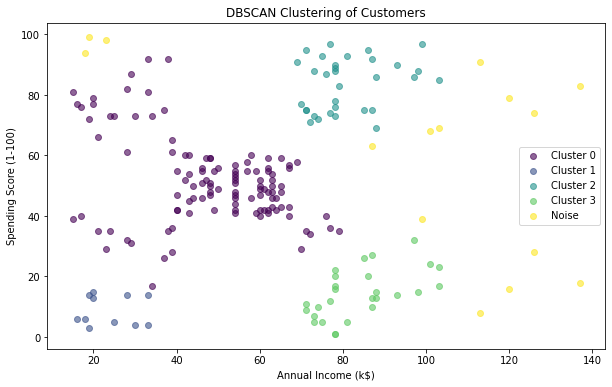

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Create a scatter plot
plt.figure(figsize=(10, 6))
unique_clusters = set(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Change colormap here

for i, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                color=colors[i], label=f'Cluster {cluster}' if cluster != -1 else 'Noise', alpha=0.6)

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


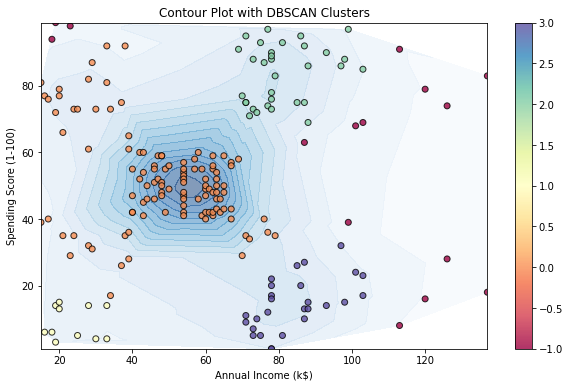

In [23]:
from scipy.stats import gaussian_kde

# Estimate the density of points
xy = np.vstack([df['Annual Income (k$)'], df['Spending Score (1-100)']])
z = gaussian_kde(xy)(xy)

# Create contour plot
plt.figure(figsize=(10, 6))
plt.tricontourf(df['Annual Income (k$)'], df['Spending Score (1-100)'], z, levels=14, cmap='Blues', alpha=0.5)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Spectral', edgecolor='k', alpha=0.8)
plt.title('Contour Plot with DBSCAN Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()


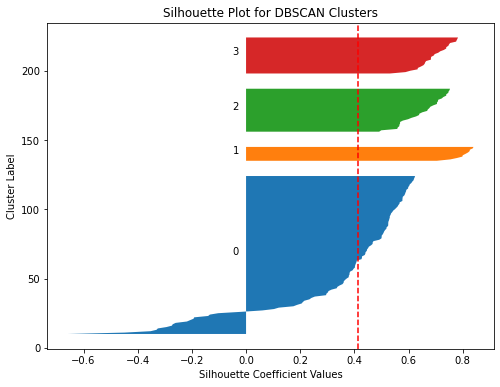

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette score
silhouette_vals = silhouette_samples(scaled_features, clusters)

# Create a silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to the cluster
    ith_cluster_silhouette_values = silhouette_vals[clusters == i]
    ith_cluster_silhouette_values.sort()
    y_upper = y_lower + ith_cluster_silhouette_values.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * ith_cluster_silhouette_values.shape[0], str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title('Silhouette Plot for DBSCAN Clusters')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.axvline(x=silhouette_score(scaled_features, clusters), color='red', linestyle='--')
plt.show()


In [25]:
# Number of clusters (excluding noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Analyze the clusters
for cluster in unique_clusters:
    if cluster != -1:
        print(f"\nCluster {cluster} statistics:")
        print(df[df['Cluster'] == cluster].describe())


Number of clusters: 4
Number of noise points: 15

Cluster 0 statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  115.000000  115.000000          115.000000              115.000000   
mean    71.452174   39.539130           48.304348               51.730435   
std     36.572745   16.050516           15.705722               14.191869   
min      1.000000   18.000000           15.000000               17.000000   
25%     43.500000   24.000000           39.000000               42.000000   
50%     72.000000   38.000000           49.000000               50.000000   
75%    100.500000   50.000000           61.500000               58.000000   
max    161.000000   70.000000           79.000000               92.000000   

       Cluster  
count    115.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 statistics:
       CustomerID        Age  Annual Income (k$)  Spending